# Sampling

In this first exercise, we will investigate how to evaluate the Q-value of each action available in a 5-armed bandit. It is mostly to give you intuition about the limits of sampling and the central limit theorem.

Let's start with importing numpy and matplotlib:

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

## Sampling a n-armed bandit

Let's now create the n-armed bandit. The only thing we need to do is to randomly choose 5 true Q-values $Q^*(a)$. 

To be generic, let's define `nb_actions=5` and create an array corresponding to the index of each action (0, 1, 2, 3, 4) for plotting purpose.

In [7]:
nb_actions = 5
actions = np.arange(nb_actions)

**Q:** Create a numpy array `Q_star` with `nb_actions` values, normally distributed with a mean of 0 and standard deviation of 1 (as in the lecture).  

In [8]:
rng = np.random.default_rng()
Q_star = rng.normal(0, 1, nb_actions)

**Q:** Plot the Q-values. Identify the optimal action.

*Tip:* you could plot the array `Q_star` with `plt.plot`, but that would be ugly. Check the documentation of the `plt.bar` method.

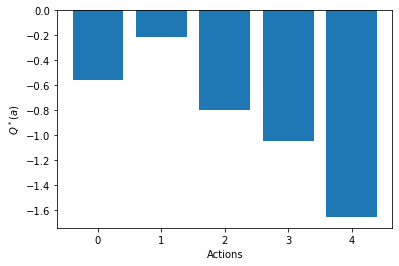

In [9]:
plt.figure()
plt.bar(actions, Q_star)
plt.xlabel('Actions')
plt.ylabel('$Q^*(a)$')
plt.show()

Great, now let's start evaluating these Q-values with random sampling.

**Q:** Define an action sampling method `get_reward` taking as arguments:
* The array `Q_star`.
* The index `a` of the action you want to sample (between 0 and 4).
* An optional variance argument `var`, which shouldhave the value 1.0 by default.
   
It should return a single value, sampled from the normal distribution with mean `Q_star[a]` and variance `var`.

In [10]:
def get_reward(Q_star, a, var=1.0):
    return float(rng.normal(Q_star[a], var, 1))

**Q:** For each possible action `a`, take `nb_samples=10` out of the reward distribution and store them in a numpy array. Compute the mean of the samples for each action separately in a new array `Q_t`. Make a bar plot of these estimated Q-values.

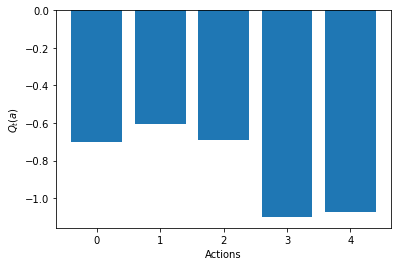

In [11]:
nb_samples = 10
rewards = np.zeros((nb_actions, nb_samples))

for a in actions:
    for play in range(nb_samples):
        rewards[a, play] = get_reward(Q_star, a, var=1.0)

Q_t = np.mean(rewards, axis=1)
    
plt.figure()
plt.bar(actions, Q_t)
plt.xlabel('Actions')
plt.ylabel('$Q_t(a)$')
plt.show()

**Q:** Make a bar plot of the difference between the true values `Q_star` and the estimates `Q_t`. Conclude. Re-run the sampling cell with different numbers of samples.

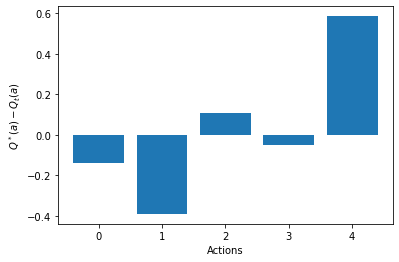

In [12]:
plt.figure()
plt.bar(actions, Q_t - Q_star)
plt.xlabel('Actions')
plt.ylabel('$Q^*(a) - Q_t(a)$')
plt.show()

**Q:** To better understand the influence of the number of samples on the accuracy of the sample average, create a `for` loop over the preceding code, with a number of samples increasing from 1 to 100. For each value, compute the **mean square error** (mse) between the estimates `Q_t` and the true values `Q^*`.

The mean square error is simply defined over the `nb_actions` actions as:

$$\epsilon = \frac{1}{N} \, \sum_{a=0}^\text{nb_actions-1} (Q_t(a) - Q^*(a))^2$$

At the end of the loop, plot the evolution of the mean square error with the number of samples. You can append each value of the mse in an empty list and then plotit with `plt.plot`, for example. 

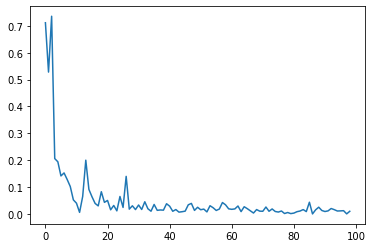

In [13]:
errors = []
for nb_sample in range(1, 100):
    
    rewards = np.zeros((nb_actions, nb_sample))

    for a in actions:
        for play in range(nb_sample):
            rewards[a, play] = get_reward(Q_star, a, var=1.0)

    Q_t = np.mean(rewards, axis=1)
    error = np.mean((Q_star - Q_t)**2)
    errors.append(error)
    
plt.figure()
plt.plot(errors)
plt.show()

The plot should give you an indication of how many samples you at least need to correctly estimate each action (30 or so). But according to the central limit theorem (CLT), the variance of the sample average also varies with the variance of the distribution itself.

> The distribution of sample averages is normally distributed with mean $\mu$ and variance $\frac{\sigma^2}{N}$.

$$S_N \sim \mathcal{N}(\mu, \frac{\sigma}{\sqrt{N}})$$

**Q:** Vary the variance of the reward distribution (as an argument to `get_reward`) and re-run the previous cell. Conclude.

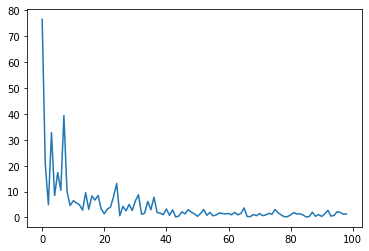

In [14]:
errors = []
for nb_sample in range(1, 100):
    
    rewards = np.zeros((nb_actions, nb_sample))

    for a in actions:
        for play in range(nb_sample):
            rewards[a, play] = get_reward(Q_star, a, var=10.0)

    Q_t = np.mean(rewards, axis=1)
    error = np.mean((Q_star - Q_t)**2)
    errors.append(error)
    
plt.plot(errors)
plt.show()

**A:** the higher the variance of the distribution, the more samples we need to get correct estimates.  

## Bandit environment

**TODO**

In [21]:
class Bandit:
    def __init__(self, nb_actions, mean=0.0, var_Q=1.0, var_r=1.0):
        # Store parameters
        self.nb_actions = nb_actions
        self.mean = mean
        self.var_Q = var_Q
        self.var_r = var_r
        
        # Initialize the true Q-values
        self.Q_star = rng.normal(self.mean, self.var_Q, self.nb_actions)
        
        # Optimal action
        self.a_star = self.Q_star.argmax()
        
    def step(self, action):
        return float(rng.normal(self.Q_star[action], self.var_r, 1))
        
nb_actions = 5
bandit = Bandit(nb_actions)

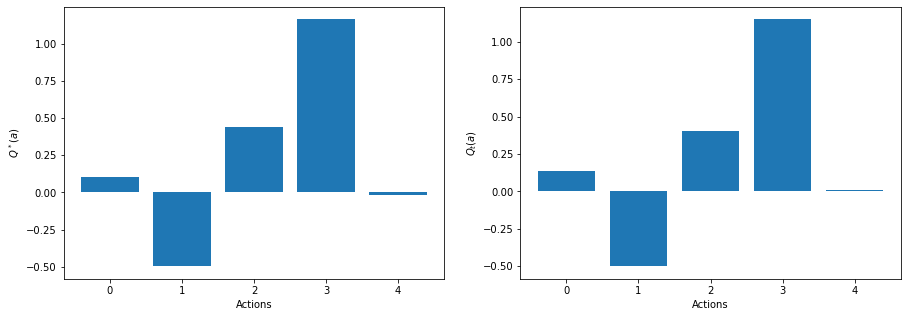

In [20]:
mean_reward = []
for a in range(nb_actions):
    
    rewards = []
    
    for t in range(1000):
        rewards.append(bandit.step(a))
    
    mean_reward.append(np.mean(rewards))
    
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.bar(range(nb_actions), bandit.Q_star)
plt.xlabel("Actions")
plt.ylabel("$Q^*(a)$")
plt.subplot(122)
plt.bar(range(nb_actions), mean_reward)
plt.xlabel("Actions")
plt.ylabel("$Q_t(a)$")
plt.show()